In [148]:
import pandas as pd
import sklearn
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import measure
%matplotlib inline

In [149]:
albs = pd.DataFrame.from_csv('../data/processed/albs_shape_info.csv')
bets = pd.DataFrame.from_csv('../data/processed/bets_shape_info.csv')
dols = pd.DataFrame.from_csv('../data/processed/dols_shape_info.csv')
lags = pd.DataFrame.from_csv('../data/processed/lags_shape_info.csv')
nofs = pd.DataFrame.from_csv('../data/processed/nofs_shape_info.csv')
oths = pd.DataFrame.from_csv('../data/processed/oths_shape_info.csv')
shas = pd.DataFrame.from_csv('../data/processed/shas_shape_info.csv')
yfts = pd.DataFrame.from_csv('../data/processed/yfts_shape_info.csv')

In [150]:
albs.columns

Index([u'filename', u'n_cons', u'avg_con_len', u'avg_shape', u'avg_length', u'avg_width', u'avg_area'], dtype='object')

In [151]:
albs['FishSpecies'] = "alb"
bets['FishSpecies'] = "bet"
dols['FishSpecies'] = "dol"
lags['FishSpecies'] = "lag"
nofs['FishSpecies'] = "nof"
oths['FishSpecies'] = "oth"
shas['FishSpecies'] = "sha"
yfts['FishSpecies'] = "yft"

In [152]:
f = [albs, bets, dols, lags, nofs, oths, shas, yfts]

In [153]:
d1 = pd.concat(f)

In [154]:
d = d1.dropna()

In [155]:
pred = d[['n_cons','avg_con_len', 'avg_shape','avg_length','avg_width', 'avg_area']]

In [156]:
out = d[['FishSpecies']]

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators = 10)

In [159]:
rfc.fit(pred, out)
###hmm, not working

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [160]:
rfc.predict_proba(pred)

array([[ 0.8,  0. ,  0. , ...,  0.2,  0. ,  0. ],
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0.1,  0. ,  0. , ...,  0. ,  0. ,  0.9],
       [ 0.1,  0. ,  0. , ...,  0. ,  0. ,  0.9],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  1. ]])

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(
    pred, out, 
    test_size=0.25, 
    random_state=0) 

print("No. Rows in training set:\t", len(X_train))
print("No. Rows in testing set:\t" , len(X_test))

('No. Rows in training set:\t', 2826)
('No. Rows in testing set:\t', 943)


In [162]:
# Train uncalibrated random forest classifier 
# on whole train and validation data 
# and evaluate on test data
clf       = sklearn.ensemble.RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)

# Get probabilities
clf_probs = clf.predict_proba(X_test)

# Test/Evaluate the the model
score     = sklearn.metrics.log_loss(y_test, clf_probs)
print("Log-loss score:\t", score)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('Log-loss score:\t', 1.6832817875531072)


In [163]:
test_fish = os.listdir('../data/raw/test_stg1')

In [164]:
rfc.feature_importances_

array([ 0.17875021,  0.16684453,  0.15491954,  0.16285848,  0.15790897,
        0.17871828])

In [165]:
pred.columns

Index([u'n_cons', u'avg_con_len', u'avg_shape', u'avg_length', u'avg_width', u'avg_area'], dtype='object')

In [166]:
###function outlines fish. 
###i should be the address of the image 
###show is a boolean value indicating whether or not you want the plot printed
###sens is the sensitivity
def fishskin(i, show, sens):
    img = Image.open(i)
    img_gray = img.convert('L')
    contours = measure.find_contours(img_gray, sens)
    contours_long = list()
    for x in range (0, len(contours)):
        if len(contours[x]) > 99:
            contours_long.append(contours[x])
    if show:
        fig, ax = plt.subplots()
        ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

        for n, contour in enumerate(contours_long):
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
        ax.axis('image')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()
    return(contours_long)

In [169]:
test_fish_con_list = list()

for i in test_fish:
#    print i
#    test_fish_con_list.append(fishskin(('../data/raw/test_stg1//'+i),False, 100))
    try:
        test_fish_con_list.append(fishskin(('../data/raw/test_stg1/'+i),False,100))
    except:
        try:
            test_fish_con_list.append(fishskin(('../data/raw/test_stg1/'+i),False,90))
        except:
            try:
                test_fish_con_list.append(fishskin(('../data/raw/test_stg1/'+i),False,80))
            except:
                try:
                    test_fish_con_list.append(fishskin(('../data/raw/test_stg1/'+i),False,70))
                except:
                    try:
                        test_fish_con_list.append(fishskin(('../data/raw/test_stg1/'+i),False,60))
                    except:
                        try:
                            test_fish_con_list.append(fishskin(('../data/raw/test_stg1/'+i),False,50))
                        except:
                            test_fish_con_list.append(np.nan)



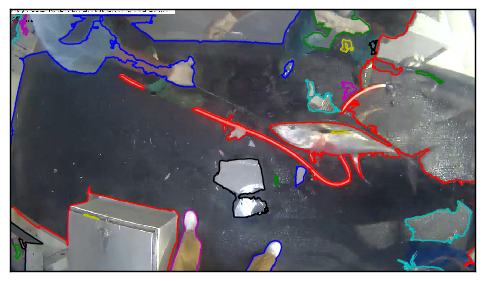

In [167]:
test_cons = fishskin('../data/raw/test_stg1/'+test_fish[1], True, 100)
#beautiful!

In [171]:
test_fish_df = pd.DataFrame(test_fish_con_list)
test_fish_df.to_csv('../data/processed/test_fish_contours.csv')

In [172]:
test_fish_info = pd.DataFrame()
test_fish_info['filename']=test_fish

In [173]:
test_fish_info['n_cons']=[len(x) for x in test_fish_con_list]

In [174]:
test_fish_info['avg_con_len']=np.nan

for x in range(0,(len(test_fish_con_list)-1)):
    lens = [len(i) for i in test_fish_con_list[x]]
    test_fish_info.loc[x,'avg_con_len']=np.mean(lens)

In [175]:
test_fish_info['avg_shape']=np.nan
test_fish_info['avg_length']=np.nan
test_fish_info['avg_width']=np.nan
test_fish_info['avg_area']=np.nan

for fish in range(0,(len(test_fish_con_list)-1)):
    fishshapes = []
    fishlengths = []
    fishwidths = []
    fishareas = []
    for contour in test_fish_con_list[fish]:
        xs = [pixel[0] for pixel in contour]
        ys = [pixel[1] for pixel in contour]
        minx = min(xs)
        maxx = max(xs)
        miny = min(ys)
        maxy = max(ys)
        fishshapes.append((maxx-minx)/(maxy-miny))
        test_fish_info.loc[fish,'avg_shape']=np.mean(fishshapes)
        fishlengths.append(maxx-minx)
        test_fish_info.loc[fish,'avg_length']=np.mean(fishlengths)
        fishwidths.append(maxy-miny)
        test_fish_info.loc[fish,'avg_width']=np.mean(fishwidths)
        fishareas.append((maxx-minx)*(maxy-miny))
        test_fish_info.loc[fish,'avg_area']=np.mean(fishareas)

In [176]:
test_fish_info.to_csv('/Users/abbiepopa/Documents/DataSci_Projects/sashimdig/data/processed/test_fish_shape_info.csv')


In [177]:
test_fish_info[1:5]

,filename,n_cons,avg_con_len,avg_shape,avg_length,avg_width,avg_area
1,img_00007.jpg,25,630.760000,1.191503,103.020518,142.134753,36774.882419
2,img_00009.jpg,25,493.400000,1.123326,71.773392,131.488106,27802.007758
3,img_00018.jpg,40,567.475000,1.052816,71.956138,116.267061,26936.923121
4,img_00027.jpg,103,346.213592,1.212831,56.355871,54.913434,6991.317049


In [195]:
test = test_fish_info[['n_cons','avg_con_len','avg_shape','avg_length','avg_width','avg_area']]
test = test.dropna()
pred_test = rfc.predict_proba(test)

In [188]:
##need to assign fish with NaNs to the standard probability distribution (most likely alb)
out = pd.DataFrame(test_fish_info[test_fish_info.isnull().any(axis=1)].filename)

In [189]:
out

,filename
999,img_07921.jpg


In [190]:
example = pd.DataFrame.from_csv('../data/raw/sample_submission_stg1.csv')

In [192]:
example[0:1]

,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
image,,,,,,,,
img_00005.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283


In [193]:
out['ALB']=0.455003
out['BET']=0.052938
out['DOL']=0.030969
out['LAG']=0.017734
out['NoF']=0.123081
out['OTHER']=0.079142
out['SHARK']=0.046585
out['YFT']=0.194283

In [194]:
out

,filename,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
999,img_07921.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283


In [196]:
pred_test[0:5]

array([[ 0.8,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.7,  0. ,  0. ,  0.1,  0. ,  0.1,  0. ,  0.1],
       [ 0.8,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0.1],
       [ 0.7,  0.1,  0. ,  0.1,  0. ,  0.1,  0. ,  0. ],
       [ 0.3,  0. ,  0. ,  0. ,  0.3,  0. ,  0. ,  0.4]])

In [197]:
pred_test_df = pd.DataFrame(pred_test)

In [205]:
pred_test_df[0:5]

,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT,filename
0,0.8,0.2,0,0.0,0.0,0.0,0,0.0,img_00005.jpg
1,0.7,0.0,0,0.1,0.0,0.1,0,0.1,img_00007.jpg
2,0.8,0.0,0,0.1,0.0,0.0,0,0.1,img_00009.jpg
3,0.7,0.1,0,0.1,0.0,0.1,0,0.0,img_00018.jpg
4,0.3,0.0,0,0.0,0.3,0.0,0,0.4,img_00027.jpg


In [200]:
pred_test_df.columns = ['ALB','BET','DOL','LAG','NoF','OTHER','SHARK','YFT']

In [202]:
fn = test_fish_info.dropna()['filename']

In [203]:
fn[0:2]

0    img_00005.jpg
1    img_00007.jpg
Name: filename, dtype: object

In [206]:
pred_test_df2 = pred_test_df[['filename', 'ALB','BET','DOL','LAG','NoF','OTHER','SHARK','YFT']]

In [207]:
pred_test_df2[0:4]

,filename,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
0,img_00005.jpg,0.8,0.2,0,0.0,0,0.0,0,0.0
1,img_00007.jpg,0.7,0.0,0,0.1,0,0.1,0,0.1
2,img_00009.jpg,0.8,0.0,0,0.1,0,0.0,0,0.1
3,img_00018.jpg,0.7,0.1,0,0.1,0,0.1,0,0.0


In [208]:
o = [pred_test_df2,out]
o = pd.concat(o)

In [209]:
o[0:4]

,filename,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
0,img_00005.jpg,0.8,0.2,0,0.0,0,0.0,0,0.0
1,img_00007.jpg,0.7,0.0,0,0.1,0,0.1,0,0.1
2,img_00009.jpg,0.8,0.0,0,0.1,0,0.0,0,0.1
3,img_00018.jpg,0.7,0.1,0,0.1,0,0.1,0,0.0


In [210]:
o.to_csv('../data/processed/shape_submission.csv')